<a href="https://colab.research.google.com/github/rohitsinghten/Mini-Project/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Importing data

In [94]:
car_dataset = pd.read_csv('/content/car data.csv')

In [95]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [96]:
car_dataset.shape

(301, 9)

In [97]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [98]:
# check for null value
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [99]:
#check the type of data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


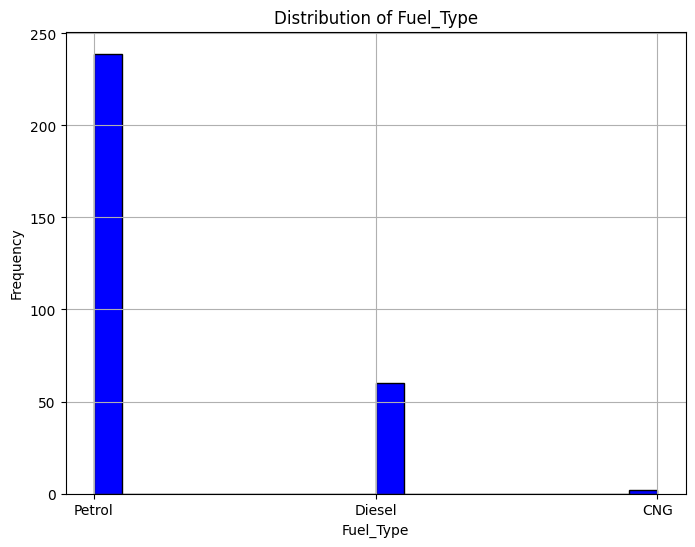

In [100]:

column_name = 'Fuel_Type'

plt.figure(figsize=(8, 6))
plt.hist(car_dataset[column_name], bins=20, color='blue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


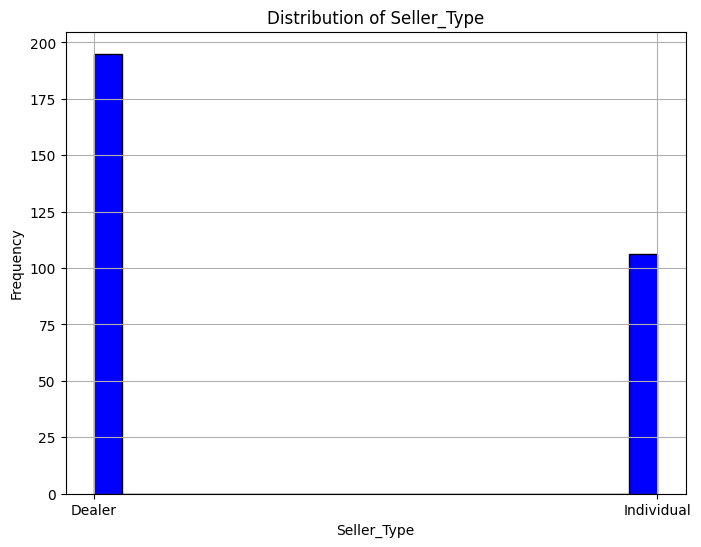

In [101]:
column_name = 'Seller_Type'

plt.figure(figsize=(8, 6))
plt.hist(car_dataset[column_name], bins=20, color='blue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

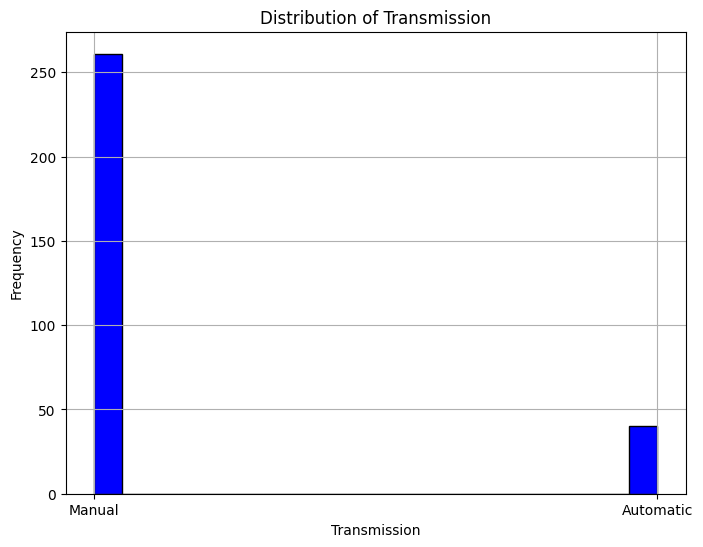

In [102]:
column_name = 'Transmission'

plt.figure(figsize=(8, 6))
plt.hist(car_dataset[column_name], bins=20, color='blue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

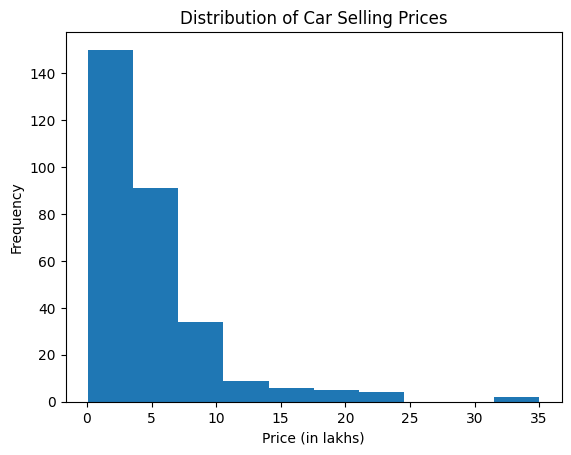

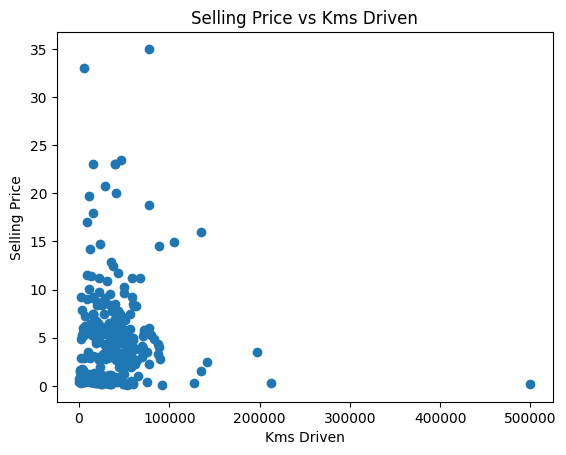

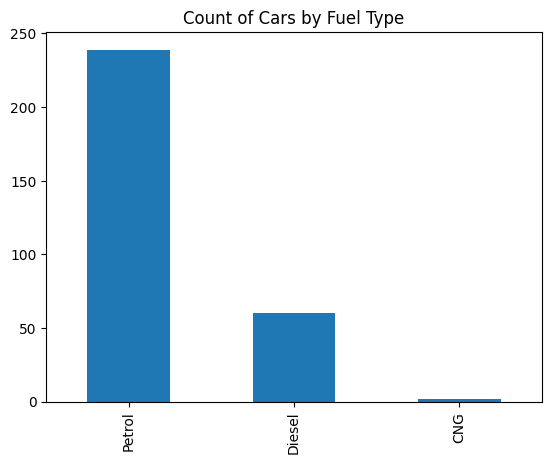

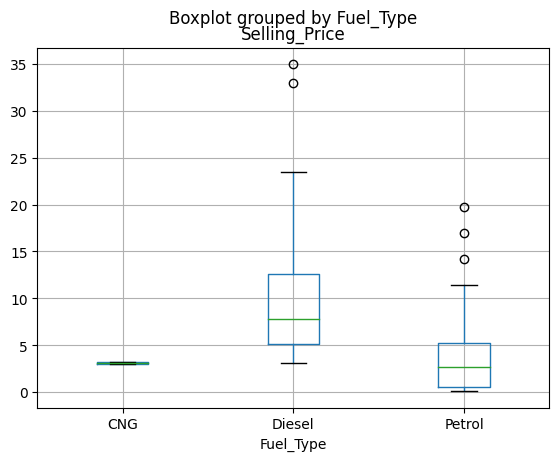

In [103]:


# Histogram of selling prices
plt.hist(car_dataset['Selling_Price'])
plt.title('Distribution of Car Selling Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

# Scatterplot of selling price vs kms driven
plt.scatter(car_dataset['Kms_Driven'], car_dataset['Selling_Price'])
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.show()

# Countplot of fuel types
plt.title('Count of Cars by Fuel Type')
car_dataset['Fuel_Type'].value_counts().plot(kind='bar')
plt.show()

# Boxplot of selling price by fuel type
car_dataset.boxplot(column='Selling_Price', by='Fuel_Type')
plt.show()

<ipython-input-104-31546cad9279>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car_dataset.corr()


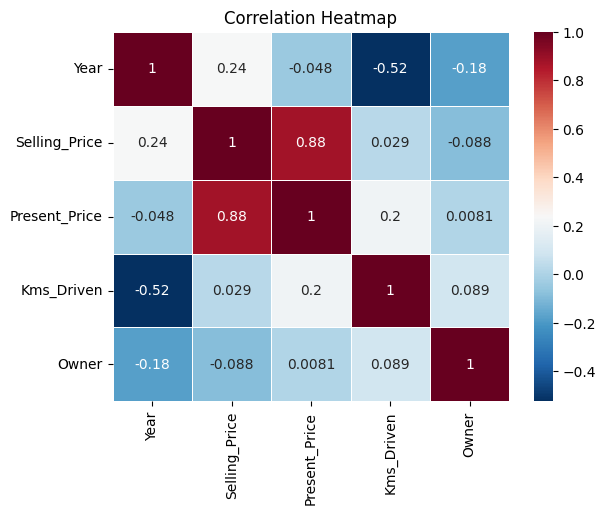

In [104]:
corr = car_dataset.corr()

sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

plt.title("Correlation Heatmap")
plt.show()

Encoding the data

In [105]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [106]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting into training and test data

here Y is our prices

In [107]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [108]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [109]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [91]:
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split



# # Load the csv file into a pandas dataframe
# df = pd.read_csv('car data.csv')

# # Preprocess the data
# df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
# df['Seller_Type'] = df['Seller_Type'].map({'Individual':0, 'Dealer':1})
# df['Transmission'] = df['Transmission'].map({'Manual':0, 'Automatic':1})

# # Define X and y
# X = df.drop(['Car_Name','Year','Selling_Price'], axis=1)
# y = df['Selling_Price']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# from sklearn.tree import DecisionTreeRegressor

# # Load data and preprocess

# # Split data into training and test sets

# # Instantiate model
# dt = DecisionTreeRegressor()

# # Fit model on training data
# dt.fit(X_train, y_train)

# # Make predictions on test data
# y_pred = dt.predict(X_test)

# print("Training Score:", dt.score(X_train, y_train))
# print("Test Score:", dt.score(X_test, y_test))
# print("Actual, Predicted")
# for actual, pred in list(zip(y_test, y_pred))[:5]:
#     print(f"{actual:.2f}, {pred:.2f}")


Splitting the data

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

In [111]:
lin_reg_model = LinearRegression()

In [112]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Evaluation

In [113]:
training_data_prediction = lin_reg_model.predict(X_train)

In [114]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


Visualize

In [115]:

import pandas as pd
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/content/car data.csv')

y_true = df['Present_Price']
y_pred = df['Selling_Price']

mse = mean_squared_error(y_true, y_pred)

print("MSE:", mse)

MSE: 32.04369869767442


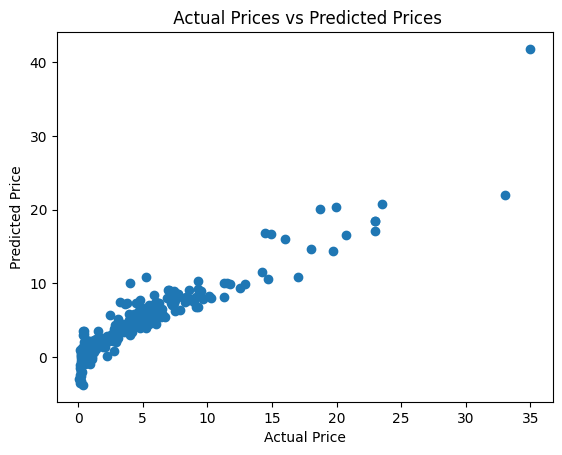

In [116]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

<ipython-input-117-462d48bd4215>:6: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(Y_train), np.log(training_data_prediction))


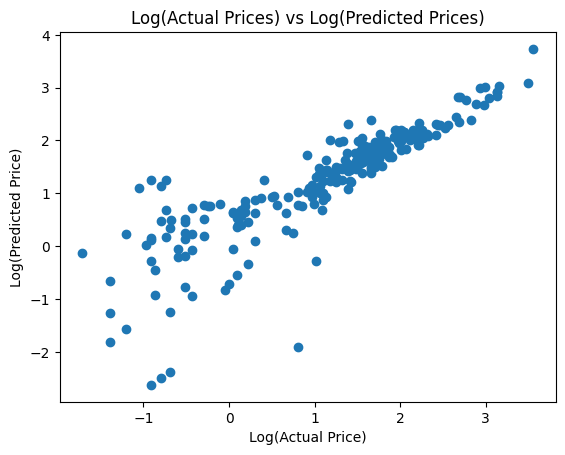

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y_train and training_data_prediction are your data arrays
# Apply a logarithmic scale to both axes
plt.scatter(np.log(Y_train), np.log(training_data_prediction))
plt.xlabel("Log(Actual Price)")
plt.ylabel("Log(Predicted Price)")
plt.title("Log(Actual Prices) vs Log(Predicted Prices)")

plt.show()



Now on test data

In [119]:
test_data_prediction = lin_reg_model.predict(X_test)

In [120]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


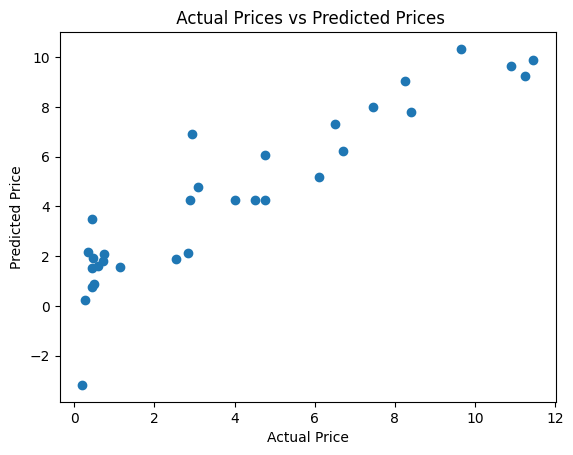

In [121]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

 Lasso Regression

In [122]:
lass_reg_model = Lasso()

In [123]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [124]:
training_data_prediction = lass_reg_model.predict(X_train)

In [125]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


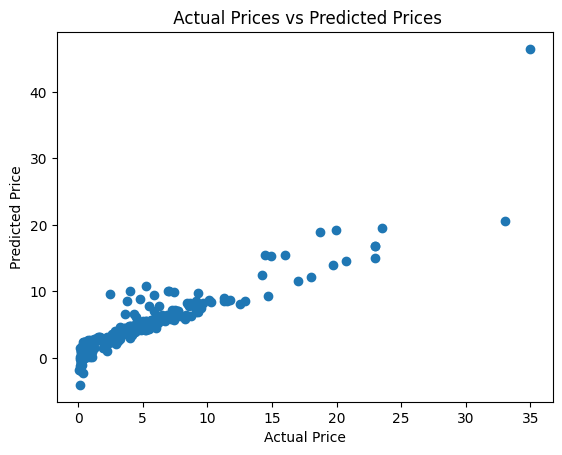

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#now for test

test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


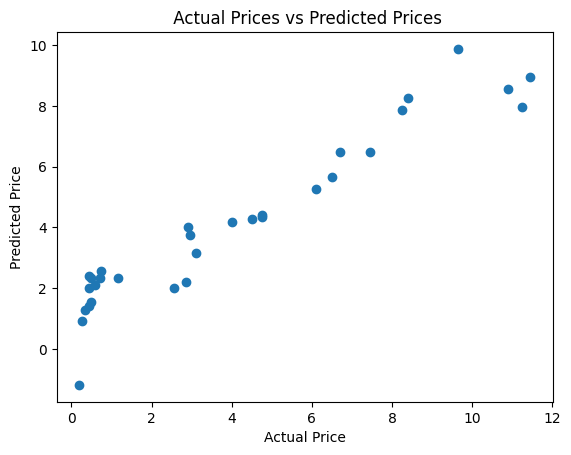

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/Car_Price_Precidtion.ipynb

[NbConvertApp] Converting notebook /content/Car_Price_Precidtion.ipynb to html
[NbConvertApp] Writing 707197 bytes to /content/Car_Price_Precidtion.html
